<a href="https://colab.research.google.com/github/k-messick/wrangling/blob/main/Lab1_WebScraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Web Scraping Lab

For this lab, I chose to look at data on appliances being sold on Craigslist.

In [54]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from bs4 import BeautifulSoup as soup # HTML parser
import requests # Page requests
import re # Regular expressions
import time # Time delays
import random # Random numbers

header = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:124.0) Gecko/20100101 Firefox/124.0'}
url = 'https://charlottesville.craigslist.org/search/ppa?purveyor=owner#search=1~thumb~0~2'
raw = requests.get(url,headers=header) # Get page


In [55]:
# Parse webpage
bsObj = soup(raw.content,'html.parser') # Parse the html
listings = bsObj.find_all(class_="cl-static-search-result") # Find all listings

In [56]:
# Data for appliances
brands = ['Laptop', 'Water Dispense','grinder','vacuums','Slow Cooker','Slicer','Air fryer','Coffee Maker','dishwasher','microwave','Refrigerator','Washer','Cast iron sink','freezer','Oven','Lamp','heaters','Sewing Machine','food processor']

In [57]:
data = [] # Saving listings in this object
for k in range( len(listings) ):
    title = listings[k].find('div',class_='title').get_text().lower()
    price = listings[k].find('div',class_='price').get_text()
    link = listings[k].find(href=True)['href']
    # Get brand from the title string:
    words = title.split()
    hits = [word for word in words if word in brands] # Find brands in the title
    if len(hits) == 0:
        brand = 'missing'
    else:
        brand = hits[0]
    # Get years from title string:
    regex_search = re.search(r'20[0-9][0-9]|19[0-9][0-9]', title ) # Find year references
    if regex_search is None: # If no hits, record year as missing value
        year = np.nan
    else: # If hits, record year as first match
        year = regex_search.group(0)
    #Append the data
    data.append({'title':title,'price':price,'year':year,'link':link,'brand':brand})



In [59]:
## Wrangle the data
df = pd.DataFrame.from_dict(data)
df['price'] = df['price'].str.replace('$','')
df['price'] = df['price'].str.replace(',','')
df['price'] = pd.to_numeric(df['price'],errors='coerce')
df['year'] = pd.to_numeric(df['year'],errors='coerce')
df['age'] = 2025-df['year']
print(df.shape)
df.to_csv('craigslist_cville_appliances.csv')
df.head()

(66, 6)


,title,price,year,link,brand,age
0,everki onyx 17 inch premium laptop backpack,150,NaN,https://charlottesville.craigslist.org/app/d/c...,missing,NaN
1,primo bottom loading water dispense,50,NaN,https://charlottesville.craigslist.org/app/d/c...,missing,NaN
2,moccamaster kbgv select coffee maker in dutch ...,175,NaN,https://charlottesville.craigslist.org/app/d/c...,grinder,NaN
3,kitchen appliances and vacuums,1,NaN,https://charlottesville.craigslist.org/app/d/c...,vacuums,NaN
4,new elite gourmet crock pot slow cooker,25,NaN,https://charlottesville.craigslist.org/app/d/c...,missing,NaN


After wrangling the data, I thought it would be intereting to look at the products' frequencies of price and brand. I was curious if one price was more popular than others-could this help sell items better? That was the first histogram. I also did a separate histogram of the type of product (brand) and its frequency. I was curious if there was one product more commonly sold than the other.

count      66.000000
mean      306.484848
std       655.400975
min         0.000000
25%        50.000000
50%       117.500000
75%       282.500000
max      4000.000000
Name: price, dtype: float64


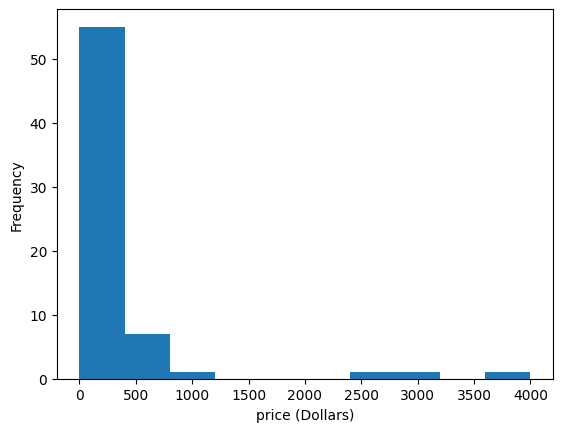

count          66
unique          7
top       missing
freq           52
Name: brand, dtype: object


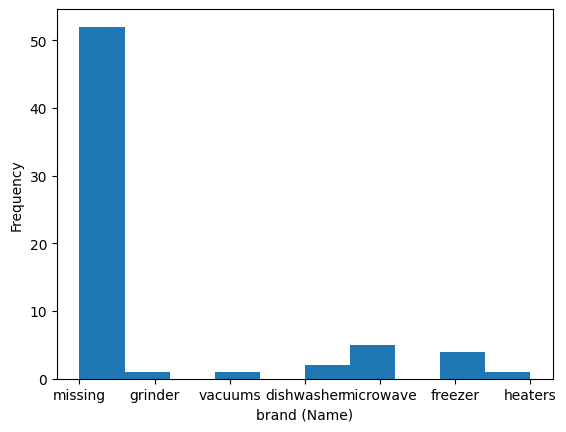

In [51]:
# EDA for price and brand:
print(df['price'].describe())
df['price'].hist(grid=False)
plt.xlabel('price (Dollars)')
plt.ylabel('Frequency')
plt.show()
print(df['brand'].describe())
df['brand'].hist(grid=False)
plt.xlabel('brand (Name)')
plt.ylabel('Frequency')
plt.show()

Based on these histograms, it seems a common price range for products was close to 0 dollars and 400 dollars. Given this, I think it would be reasonable to say that someone might be more likely to sell their item sticking in this range. In terms of brand frequency, I was surprised to see that a lot of items did not have a brand associated with them. I think this would be an important piece of information to include to help sell products because a lot of people search for specific named items. I would encourage sellers to start including it.

In [60]:
# Price by brand:
df.loc[:,['price','brand']].groupby('brand').describe()

price                                                              
           count        mean         std    min     25%    50%     75%     max
brand                                                                         
dishwasher   2.0  162.500000  159.099026   50.0  106.25  162.5  218.75   275.0
freezer      4.0  177.500000  114.418821   80.0   80.00  165.0  262.50   300.0
grinder      1.0  175.000000         NaN  175.0  175.00  175.0  175.00   175.0
heaters      1.0   80.000000         NaN   80.0   80.00   80.0   80.00    80.0
microwave    5.0   88.800000   53.147907   20.0   50.00  100.0  125.00   149.0
missing     52.0  355.634615  730.463539    0.0   50.00  120.0  331.25  4000.0
vacuums      1.0    1.000000         NaN    1.0    1.00    1.0    1.00     1.0

I was then curious on the outlook of the variation in the same product being sold. I chose microwaves for this analysis. I was intrigued by the price range, but also thought it was validated when I looked at the photos and descriptions of each one.

In [61]:
df.loc[ df['brand']=='microwave',:]

,title,price,year,link,brand,age
12,older ge profile washer and brand new lg micro...,50,NaN,https://charlottesville.craigslist.org/app/d/b...,microwave,NaN
27,ge 1050-watt air fry countertop convection mic...,149,NaN,https://charlottesville.craigslist.org/app/d/t...,microwave,NaN
35,ge 1150watt microwave,20,NaN,https://charlottesville.craigslist.org/app/d/c...,microwave,NaN
36,microwave oven counter top frigidaire,100,NaN,https://charlottesville.craigslist.org/app/d/c...,microwave,NaN
63,kenmore elite hood range microwave,125,NaN,https://charlottesville.craigslist.org/app/d/c...,microwave,NaN


<Axes: xlabel='brand', ylabel='price'>

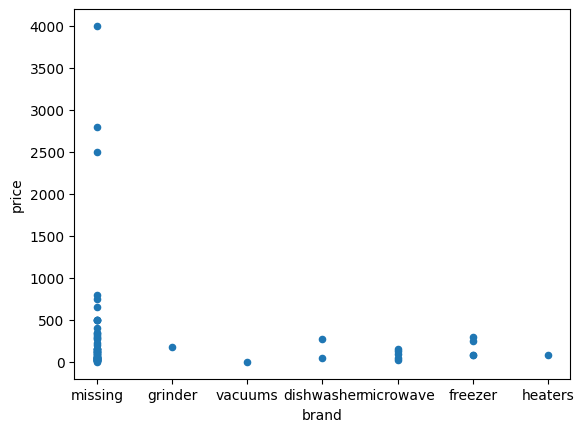

In [62]:
df.plot.scatter('brand','price')